In [1]:
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import io

In [2]:
filename = '/home/garner1/histoqc_output_20200609-091759/TCGA-55-8301-01Z-00-DX1.2A66E0FC-84F2-4DF8-B06E-D7CDD7AA82C7.svs/TCGA-55-8301-01Z-00-DX1.2A66E0FC-84F2-4DF8-B06E-D7CDD7AA82C7.svs_mask_use.png'
image = io.imread(filename)

In [3]:
import os.path 
lista = os.path.basename(filename).split(sep='.')
filename  =lista[0]+'.'+lista[1] # get the sample ID

In [4]:
# locate the result file
import pandas as pd
results = '/home/garner1/histoqc_output_20200609-091759/results.tsv'
df = pd.read_csv(results,sep='\t',skiprows=(0,1,2,3,4))

In [5]:
# find the size in pixl of the original 
arr = df[df[df.columns[0]].str.contains(filename)][['height','width']].to_numpy()
h = arr[0,0]
w = arr[0,1]

/home/garner1/miniconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


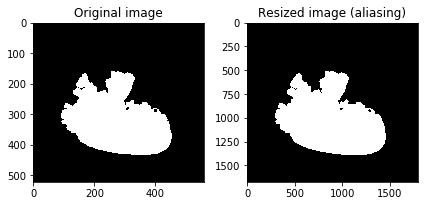

In [6]:
import numpy as np
image_resized = resize(image, (h//10, w//10),anti_aliasing=True).astype('bool')

fig, axes = plt.subplots(nrows=1, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_resized, cmap='gray')
ax[1].set_title("Resized image (aliasing)")

plt.tight_layout()
plt.show()

In [ ]:
# Now you need to apply the mask to the svs file